## Performances for point 4 and 5

In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.UCB_Learner import *
from Advertising.learners.UCB_Learner_qualities import *
from Advertising.learners.GTS_Learner_qualities import *
from experiment_utilities import *

seed = 6789 
arms = arms_creation(seed = 30291, number_of_arms= 20)
random.seed(seed)
n_tries=10
exploration=4.2

deltas=[0.5,0.42,0.38,0.30,0.2,0.05]

social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')

with open('Config/estimated_influence.json', 'r') as file:
    data = json.load(file)
    nodes_estimation = data.get('estimated_influence')

with open('Config/clairvoyants.json', 'r') as file:
    clairvoyants = json.load(file)

with open('Config/bids.json', 'r') as file:
    data = json.load(file)
    bids = data.get('bids')

n_rounds=7000

all_bids = bids[0]



### Testing: point 4, only samples in first position

In [2]:
all_moving_average_point4_f = []
all_bounds_point4_f=[]
all_exp_rewards_point4_f=[]
all_best_point4_f=[]

all_moving_average_point4_f_ts = []

all_rewards_point4_f_ucb=[]
all_rewards_point4_f_ts=[]

for _ in range(n_tries):
    learner = UCB_Learner_qualities(arms = arms, hyperpar = exploration, nodes_estimation = nodes_estimation)
    learner_ts = GTS_Learner_qualities(arms=arms, variance=20, ad_id=1, nodes_estimation = nodes_estimation)
    moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids, arms = arms,
                                social_network= social_network, first = True, qualities = True)
    moving_average_ts = experiment(rounds = n_rounds, learner = learner_ts, all_bids = all_bids, arms = arms,
                                social_network= social_network, first = True, qualities = True)
    all_moving_average_point4_f.append(moving_average)
    all_bounds_point4_f.append(learner.bounds)
    all_exp_rewards_point4_f.append(learner.exp_values)
    all_best_point4_f.append(arms[np.argmax(learner.exp_values)])
    all_moving_average_point4_f_ts.append(moving_average_ts)
    all_rewards_point4_f_ucb.append(learner.collected_rewards)
    all_rewards_point4_f_ts.append(learner_ts.collected_rewards)




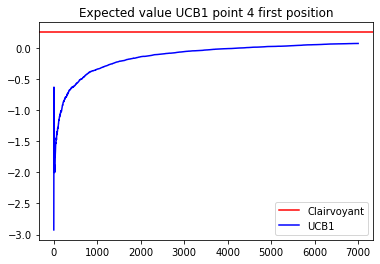

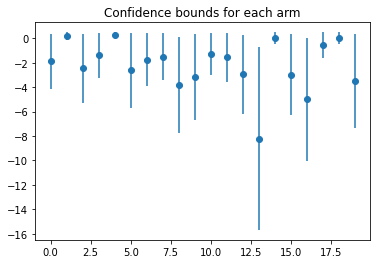

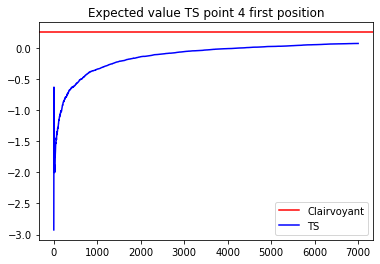

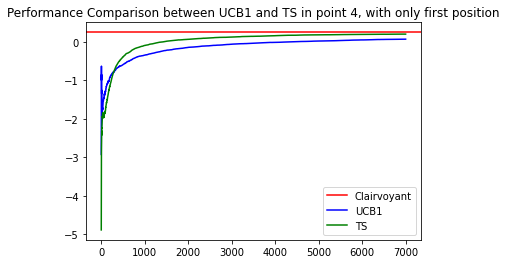

Text(0.5, 1.0, 'Comparison between cumulative regrets of UCB1 and TS, point 4 first position')

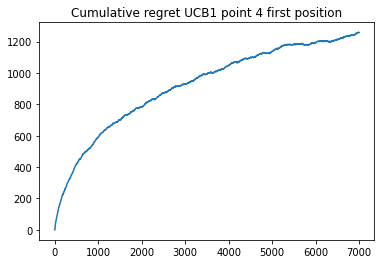

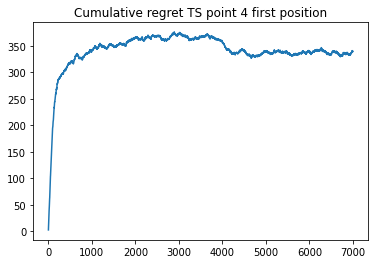

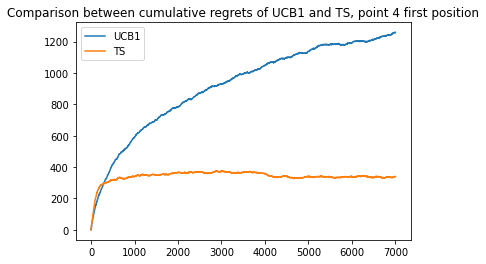

In [3]:
moving_average=np.mean(all_moving_average_point4_f, axis=0)
clairvoyant = clairvoyants.get('clairvoyant_q_f')
moving_average_ts=np.mean(all_moving_average_point4_f_ts, axis=0)
title = 'Performance Comparison between UCB1 and TS in point 4, with only first position'
rewards_per_exp_point4_f_ucb=np.mean(all_rewards_point4_f_ucb, axis=0)
rewards_per_exp_point4_f_ts=np.mean(all_rewards_point4_f_ts, axis=0)

cum_regret_point4_f_ucb = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point4_f_ucb))
cum_regret_point4_f_ts = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point4_f_ts))

exp_rewards_point4_f=np.mean(all_exp_rewards_point4_f, axis=0)
bounds_point4_f=np.mean(all_bounds_point4_f, axis=0)

plot_clairvoyant(clairvoyant, moving_average, 'UCB1', title='Expected value UCB1 point 4 first position')
plt.errorbar(x=[i for i in range(20)], y=exp_rewards_point4_f, yerr=bounds_point4_f, fmt='o')
plt.title('Confidence bounds for each arm')

plot_clairvoyant(clairvoyant, moving_average, 'TS', title='Expected value TS point 4 first position')
plot_clairvoyant(clairvoyant, moving_average, 'UCB1', moving_average_ts, 'TS', title)

plt.figure()
plt.plot(cum_regret_point4_f_ucb)
plt.title('Cumulative regret UCB1 point 4 first position')

plt.figure()
plt.plot(cum_regret_point4_f_ts)
plt.title('Cumulative regret TS point 4 first position')

plt.figure()
plt.plot(cum_regret_point4_f_ucb, label='UCB1')
plt.plot(cum_regret_point4_f_ts, label='TS')
plt.legend()
plt.title('Comparison between cumulative regrets of UCB1 and TS, point 4 first position')


### Testing: point 4, all samples available

In [4]:
all_moving_average_point4_a = []
all_bounds_point4_a=[]
all_exp_rewards_point4_a=[]
all_best_point4_a=[]

all_moving_average_point4_a_ts=[]

all_rewards_point4_a_ucb=[]
all_rewards_point4_a_ts=[]

for _ in range(n_tries):
    learner = UCB_Learner_qualities(arms = arms, hyperpar = exploration, nodes_estimation = nodes_estimation)
    learner_ts = GTS_Learner_qualities(arms=arms, variance=20, ad_id=1, nodes_estimation = nodes_estimation)
    moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids, 
                                arms = arms,
                                social_network= social_network,first = False, qualities = True)
    moving_average_ts = experiment(rounds = n_rounds, learner = learner_ts, all_bids = all_bids, arms = arms,
                                social_network= social_network, first = False, qualities = True)
    all_moving_average_point4_a.append(moving_average)
    all_bounds_point4_a.append(learner.bounds)
    all_exp_rewards_point4_a.append(learner.exp_values)
    all_best_point4_a.append(arms[np.argmax(learner.exp_values)])
    all_moving_average_point4_a_ts.append(moving_average_ts)
    all_rewards_point4_a_ucb.append(learner.collected_rewards)
    all_rewards_point4_a_ts.append(learner_ts.collected_rewards)

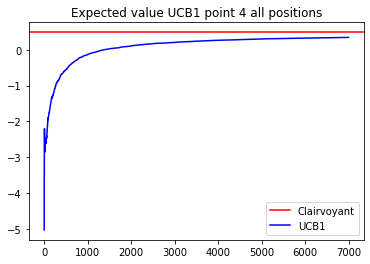

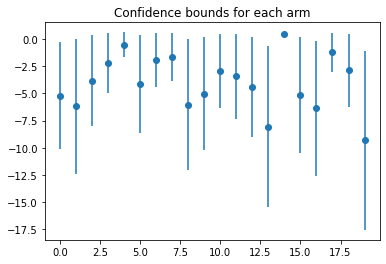

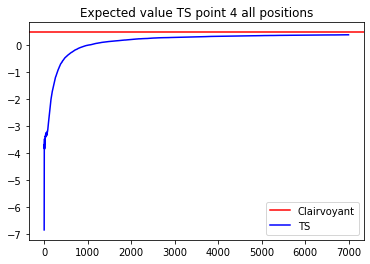

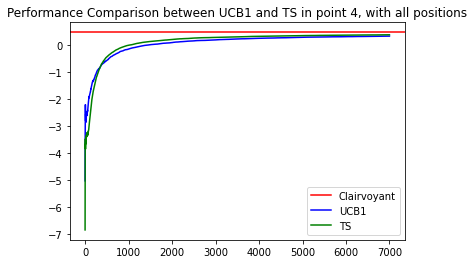

Text(0.5, 1.0, 'Comparison between cumulative regrets of UCB1 and TS, point 4 all positions')

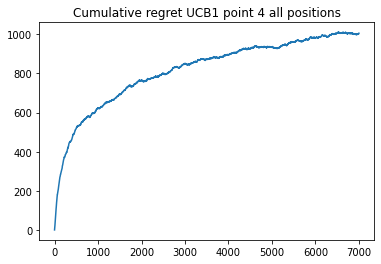

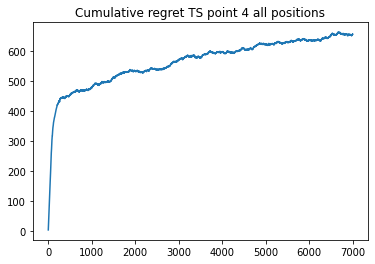

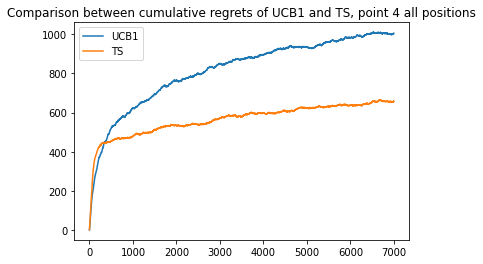

In [5]:
moving_average=np.mean(all_moving_average_point4_a, axis=0)
clairvoyant = clairvoyants.get('clairvoyant_q_a')
moving_average_ts=np.mean(all_moving_average_point4_a_ts, axis=0)
title = 'Performance Comparison between UCB1 and TS in point 4, with all positions'
rewards_per_exp_point4_a_ucb=np.mean(all_rewards_point4_a_ucb, axis=0)
rewards_per_exp_point4_a_ts=np.mean(all_rewards_point4_a_ts, axis=0)

cum_regret_point4_a_ucb = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point4_a_ucb))
cum_regret_point4_a_ts = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point4_a_ts))

exp_rewards_point4_a=np.mean(all_exp_rewards_point4_a, axis=0)
bounds_point4_a=np.mean(all_bounds_point4_a, axis=0)

plot_clairvoyant(clairvoyant, moving_average, label='UCB1', title='Expected value UCB1 point 4 all positions')
plt.errorbar(x=[i for i in range(20)], y=exp_rewards_point4_a, yerr=bounds_point4_a, fmt='o')
plt.title('Confidence bounds for each arm')

plot_clairvoyant(clairvoyant, moving_average_ts, 'TS', title='Expected value TS point 4 all positions')

plot_clairvoyant(clairvoyant, moving_average, 'UCB1', moving_average_ts, 'TS', title)

plt.figure()
plt.plot(cum_regret_point4_a_ucb)
plt.title('Cumulative regret UCB1 point 4 all positions')

plt.figure()
plt.plot(cum_regret_point4_a_ts)
plt.title('Cumulative regret TS point 4 all positions')

plt.figure()
plt.plot(cum_regret_point4_a_ucb, label='UCB1')
plt.plot(cum_regret_point4_a_ts, label='TS')
plt.legend()
plt.title('Comparison between cumulative regrets of UCB1 and TS, point 4 all positions')

### Testing: point 5, only samples in first position

In [6]:
all_moving_average_point5_f = []
all_bounds_point5_f = []
all_exp_rewards_point5_f=[]
all_best_point5_f = []

all_moving_average_point5_f_ts=[]

all_rewards_point5_f_ucb=[]
all_rewards_point5_f_ts=[]

for _ in range(n_tries):
    learner = UCB_Learner(arms = arms, hyperpar = exploration)
    learner_ts = GTS_Learner(arms=arms, variance=20, ad_id=1)
    moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids,
                                arms = arms,
                                social_network= social_network, first = True, qualities = False)
    moving_average_ts = experiment(rounds = n_rounds, learner = learner_ts, all_bids = all_bids,
                                arms = arms,
                                social_network= social_network, first = True, qualities = False)
    all_moving_average_point5_f.append(moving_average)
    all_bounds_point5_f.append(learner.bounds)
    all_exp_rewards_point5_f.append(learner.exp_values)
    all_best_point5_f.append(arms[np.argmax(learner.exp_values)])

    all_moving_average_point5_f_ts.append(moving_average_ts)
    all_rewards_point5_f_ucb.append(learner.collected_rewards)
    all_rewards_point5_f_ts.append(learner_ts.collected_rewards)


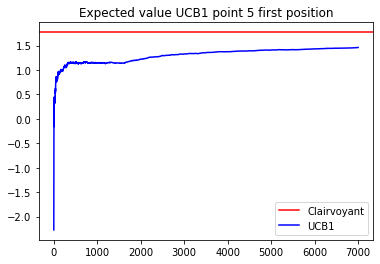

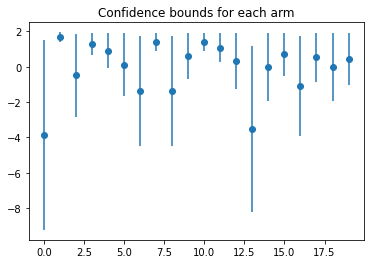

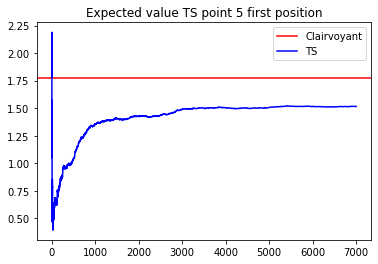

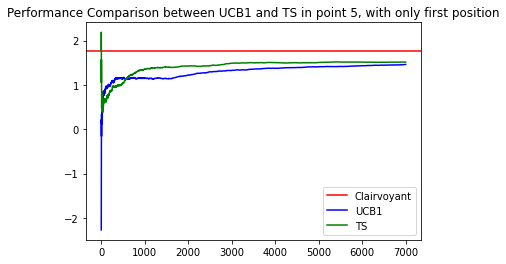

Text(0.5, 1.0, 'Comparison between cumulative regrets of UCB1 and TS, point 5 first position')

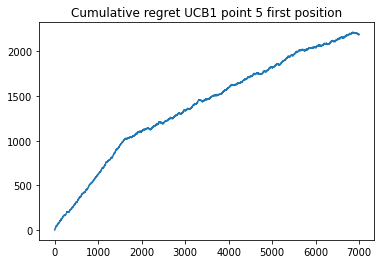

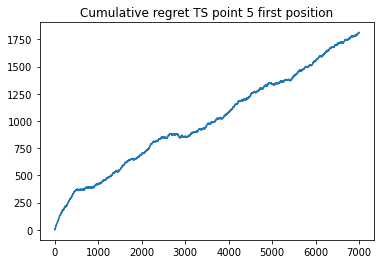

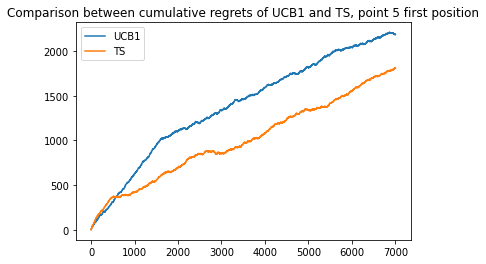

In [7]:
moving_average=np.mean(all_moving_average_point5_f, axis=0)
moving_average_ts=np.mean(all_moving_average_point5_f_ts, axis=0)
clairvoyant = clairvoyants.get('clairvoyant_nq_f')
title = 'Performance Comparison between UCB1 and TS in point 5, with only first position'
rewards_per_exp_point5_f_ucb=np.mean(all_rewards_point5_f_ucb, axis=0)
rewards_per_exp_point5_f_ts=np.mean(all_rewards_point5_f_ts, axis=0)

cum_regret_point5_f_ucb = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point5_f_ucb))
cum_regret_point5_f_ts = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point5_f_ts))

exp_rewards_point5_f=np.mean(all_exp_rewards_point5_f, axis=0)
bounds_point5_f=np.mean(all_bounds_point5_f, axis=0)

plot_clairvoyant(clairvoyant, moving_average, label='UCB1', title='Expected value UCB1 point 5 first position')
plt.errorbar(x=[i for i in range(20)], y=exp_rewards_point5_f, yerr=bounds_point5_f, fmt='o')
plt.title('Confidence bounds for each arm')

plot_clairvoyant(clairvoyant, moving_average_ts, 'TS', title='Expected value TS point 5 first position')

plot_clairvoyant(clairvoyant, moving_average, 'UCB1', moving_average_ts, 'TS', title)

plt.figure()
plt.plot(cum_regret_point5_f_ucb)
plt.title('Cumulative regret UCB1 point 5 first position')

plt.figure()
plt.plot(cum_regret_point5_f_ts)
plt.title('Cumulative regret TS point 5 first position')

plt.figure()
plt.plot(cum_regret_point5_f_ucb, label='UCB1')
plt.plot(cum_regret_point5_f_ts, label='TS')
plt.legend()
plt.title('Comparison between cumulative regrets of UCB1 and TS, point 5 first position')

### Testing: point 5, all samples available

In [8]:
all_moving_average_point5_a=[]
all_bounds_point5_a=[]
all_exp_rewards_point5_a=[]
all_best_point5_a=[]

all_moving_average_point5_a_ts=[]

all_rewards_point5_a_ucb=[]
all_rewards_point5_a_ts=[]

for _ in range(n_tries):
    learner = UCB_Learner(arms = arms, hyperpar = exploration)
    learner_ts = GTS_Learner(arms=arms, variance=20, ad_id=1)
    moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids,
                                arms = arms,
                                social_network= social_network, first = False, qualities = False)
    moving_average_ts = experiment(rounds = n_rounds, learner = learner_ts, all_bids = all_bids,
                                arms = arms,
                                social_network= social_network, first = False, qualities = False)
    all_moving_average_point5_a.append(moving_average)
    all_bounds_point5_a.append(learner.bounds)
    all_exp_rewards_point5_a.append(learner.exp_values)
    all_best_point5_a.append(arms[np.argmax(learner.exp_values)])

    all_moving_average_point5_a_ts.append(moving_average_ts)
    all_rewards_point5_a_ucb.append(learner.collected_rewards)
    all_rewards_point5_a_ts.append(learner_ts.collected_rewards)

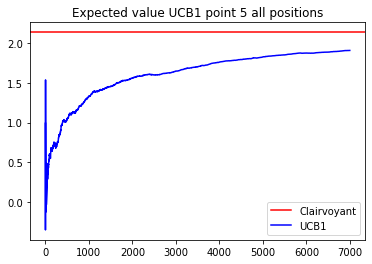

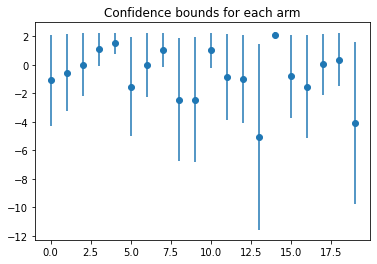

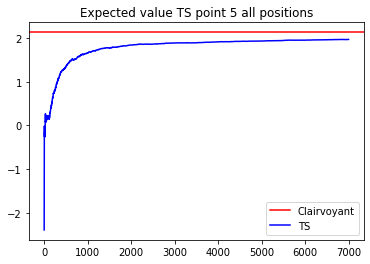

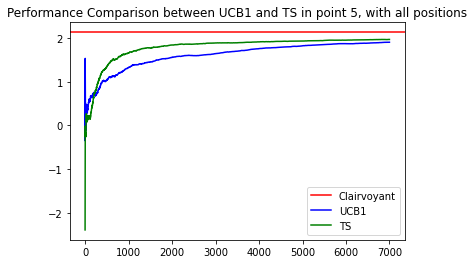

Text(0.5, 1.0, 'Comparison between cumulative regrets of UCB1 and TS, point 5 all positions')

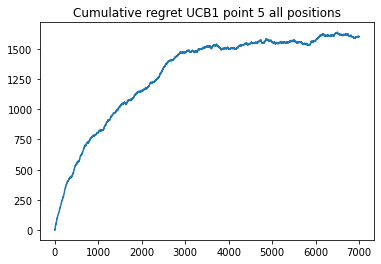

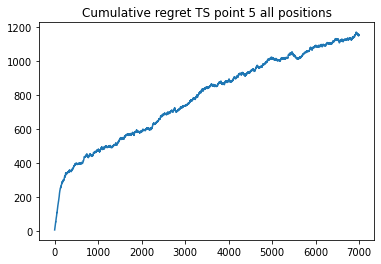

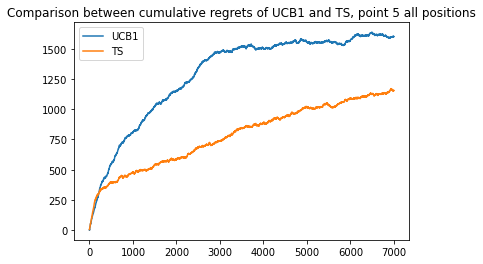

In [9]:
moving_average=np.mean(all_moving_average_point5_a, axis=0)
clairvoyant = clairvoyants.get('clairvoyant_nq_a')
moving_average_ts=np.mean(all_moving_average_point5_a_ts, axis=0)
title = 'Performance Comparison between UCB1 and TS in point 5, with all positions'
rewards_per_exp_point5_a_ucb=np.mean(all_rewards_point5_a_ucb, axis=0)
rewards_per_exp_point5_a_ts=np.mean(all_rewards_point5_a_ts, axis=0)

cum_regret_point5_a_ucb = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point5_a_ucb))
cum_regret_point5_a_ts = np.cumsum(np.subtract(clairvoyant, rewards_per_exp_point5_a_ts))

exp_rewards_point5_a=np.mean(all_exp_rewards_point5_a, axis=0)
bounds_point5_a=np.mean(all_bounds_point5_a, axis=0)

plot_clairvoyant(clairvoyant, moving_average, label='UCB1', title='Expected value UCB1 point 5 all positions')
plt.errorbar(x=[i for i in range(20)], y=exp_rewards_point5_a, yerr=bounds_point5_a, fmt='o')
plt.title('Confidence bounds for each arm')

plot_clairvoyant(clairvoyant, moving_average_ts, 'TS', title='Expected value TS point 5 all positions')

plot_clairvoyant(clairvoyant, moving_average, 'UCB1', moving_average_ts, 'TS', title)

plt.figure()
plt.plot(cum_regret_point5_a_ucb)
plt.title('Cumulative regret UCB1 point 5 all positions')

plt.figure()
plt.plot(cum_regret_point5_a_ts)
plt.title('Cumulative regret TS point 5 all positions')

plt.figure()
plt.plot(cum_regret_point5_a_ucb, label='UCB1')
plt.plot(cum_regret_point5_a_ts, label='TS')
plt.legend()
plt.title('Comparison between cumulative regrets of UCB1 and TS, point 5 all positions')